In [25]:
from src.data.access import DbAccessLayer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [22]:
db_access = DbAccessLayer()
match_df = db_access.load_table('Match')
leagues_df = db_access.load_table('League')

### 1. Bookmaker Performance
In order to properly evaluate model performance, it is important to understand if/how the performance of the predictions of the bookkeepers has changed over the years.

In [23]:
bk_match_df = match_df.dropna(subset=['B365H', 'B365D', 'B365A'])

# Only consider first divisions
top_leagues =  leagues_df[leagues_df['Division'] == 1]['LeagueID'].tolist()
bk_match_df = bk_match_df[bk_match_df['LeagueID'].isin(top_leagues)]

bk_match_df['B365Pred'] = bk_match_df[['B365H', 'B365D', 'B365A']].idxmin(axis=1).str[-1:]
bk_match_df['B365PredProba'] = 1 / bk_match_df[['B365H', 'B365D', 'B365A']].min(axis=1)
bk_match_df['B365PredCorrect'] = (bk_match_df['B365Pred'] == bk_match_df['FTR']).astype(int)
bk_match_df['B365PredProbaError'] = 1 - bk_match_df['B365PredProba']
bk_match_df

,MatchID,LeagueID,Date,HomeTeamID,AwayTeamID,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgCAHA,LB,LB.1,LB.2,HFKC,AFKC,B365Pred,B365PredProba,B365PredCorrect,B365PredProbaError
613,614,1,2002-10-08,10.0,6.0,1.0,1.0,D,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,A,0.476190,0,0.523810
614,615,1,2002-10-08,19.0,2.0,0.0,0.0,D,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,A,0.579039,0,0.420961
615,616,1,2002-10-08,21.0,12.0,1.0,3.0,A,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,H,0.523834,0,0.476166
616,617,1,2002-10-08,9.0,16.0,1.0,0.0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,H,0.636537,1,0.363463
617,618,1,2002-10-08,14.0,5.0,1.0,1.0,D,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,H,0.476190,0,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125290,125291,11,2022-05-22,416.0,372.0,0.0,3.0,A,0.0,3.0,...,1.89,NaN,NaN,NaN,NaN,NaN,A,0.653595,1,0.346405
125291,125292,11,2022-05-22,380.0,397.0,3.0,0.0,H,0.0,0.0,...,1.88,NaN,NaN,NaN,NaN,NaN,H,0.877193,1,0.122807
125292,125293,11,2022-05-22,410.0,374.0,0.0,3.0,A,0.0,3.0,...,1.89,NaN,NaN,NaN,NaN,NaN,A,0.689655,1,0.310345
125293,125294,11,2022-05-22,417.0,379.0,0.0,4.0,A,0.0,3.0,...,1.99,NaN,NaN,NaN,NaN,NaN,H,0.588235,0,0.411765


<AxesSubplot:xlabel='Season'>

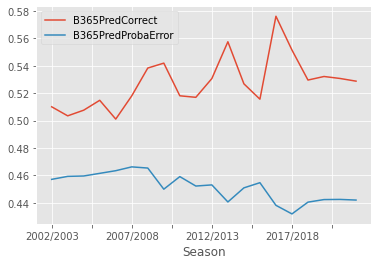

In [26]:
bk_match_df.groupby('Season')[['B365PredCorrect', 'B365PredProbaError']].mean().plot()